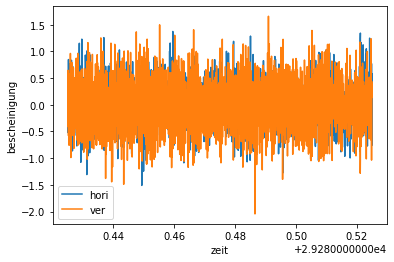

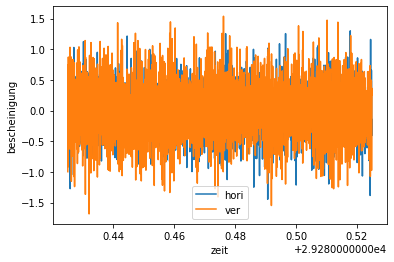

In [81]:
# Aufgabe 1

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

path1 = r'C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4\acc_00001.csv'
path2 = r'C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4\acc_00002.csv'


# Convert time in seconds
def time_collect(path):
    time = []
    df = pd.read_csv(path,sep=';',header=None,names=['h','min','s','us','hori','vert'])
    
    for i in range(df1.shape[0]):
        temp_time = int(df1.iloc[i:i+1,0]) * 3600 + int(df1.iloc[i:i+1,1]) * 60 + \
                    int(df1.iloc[i:i+1,2]) + float(df1.iloc[i:i+1,3]) * 0.000001
        
        time.append(temp_time)
    return time


df = pd.read_csv(path1,sep=';',header=None,names=['h','min','s','us','hori','vert'])

time1 = time_collect(path1)

plt.plot(time1,df['hori'],label='hori')
plt.plot(time1,df['vert'],label='ver')
plt.xlabel('zeit')
plt.ylabel('bescheinigung')
plt.legend()
plt.show()


df = pd.read_csv(path2,sep=';',header=None,names=['h','min','s','us','hori','vert'])

time2 = time_collect(path2)

plt.plot(time2,df['hori'],label='hori')
plt.plot(time2,df['vert'],label='ver')
plt.xlabel('zeit')
plt.ylabel('bescheinigung')
plt.legend()
plt.show()

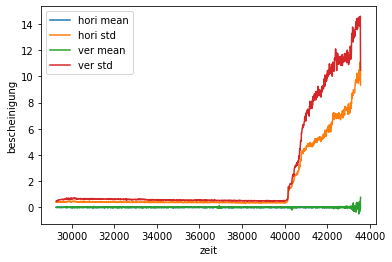

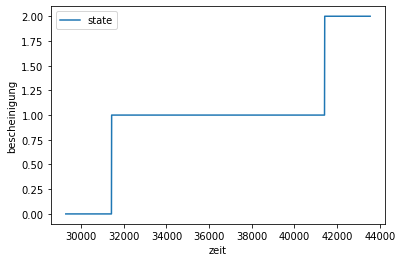

,Unnamed: 0,file,state,horizontal mean,horizontal std,vertikal mean,vertikal std,start time
0,0,acc_00001.csv,0,0.006386,0.403295,0.001648,0.454933,29280.42504
1,1,acc_00002.csv,0,-0.008861,0.390664,0.006299,0.459195,29290.42504
2,2,acc_00003.csv,0,-0.006355,0.391883,-0.008353,0.491408,29300.42504
3,3,acc_00004.csv,0,-0.005948,0.415829,-0.001811,0.474722,29310.42504
4,4,acc_00005.csv,0,-0.001927,0.386722,0.006672,0.511625,29320.42504
...,...,...,...,...,...,...,...,...
1423,1423,acc_01424.csv,2,0.056401,10.546484,-0.324740,14.545607,43510.42504
1424,1424,acc_01425.csv,2,-0.116174,10.555894,-0.037699,14.070066,43520.42504
1425,1425,acc_01426.csv,2,-0.163997,11.102769,0.076484,14.198893,43530.42504
1426,1426,acc_01427.csv,2,-0.144430,10.895817,0.268871,14.594464,43540.42504


In [56]:
# Aufgabe 2

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# Walk all files
import os

def walk_files(path,endpoint=None):
    file_list = []
    for root,dirs,files in os.walk(path):
        for file in files:
            file_path = os.path.join(root,file)
            if file_path.endswith(endpoint):
                file_list.append(file_path)

    return file_list

wav_path = r'C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4'
text_list = walk_files(wav_path, endpoint=".csv")


# Mean ,Std and Time
hori_mean = []
hori_std = []
ver_mean = []
ver_std = []
time = []

# dont read the last file(health_state)
for i in range(len(text_list)-1):
    df = pd.read_csv(text_list[i],sep=';',header=None,names=['h','min','s','us','hori','vert'])
    
    hori_mean.append(float(df.iloc[:,[4]].mean()))
    hori_std.append(float(df.iloc[:,[4]].std()))
    ver_mean.append(float(df.iloc[:,[5]].mean()))
    ver_std.append(float(df.iloc[:,[5]].std()))
    
    time_start = int(df.iloc[0:1,0]) * 3600 + int(df.iloc[0:1,1]) * 60 + \
                    int(df.iloc[0:1,2]) + float(df.iloc[0:1,3]) * 0.000001
    
    time.append(time_start)

path_state = r'C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4\Bearing1_4_health_state.csv'

# Insert hori/verti mean and STD to health_state.csv
df_all = pd.read_csv(path_state)
df_all['horizontal mean'] = hori_mean
df_all['horizontal std'] = hori_std
df_all['vertikal mean'] = ver_mean
df_all['vertikal std'] = ver_std
df_all['start time'] = time



plt.plot(time,df_all['horizontal mean'],label='hori mean')
plt.plot(time,df_all['horizontal std'],label='hori std')
plt.plot(time,df_all['vertikal mean'],label='ver mean')
plt.plot(time,df_all['vertikal std'],label='ver std')
plt.xlabel('zeit')
plt.ylabel('bescheinigung')
plt.legend()
plt.show()

plt.plot(time,df_all['state'],label='state')
plt.xlabel('zeit')
plt.ylabel('bescheinigung')
plt.legend()
plt.show()

df_all.head(1428)

    

In [65]:
# Aufgabe 3

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt


import os

hori_mean = []
hori_std = []
ver_mean = []
ver_std = []

# save all data to seperate csv with folders' name

for root1, dirs1, files1 in os.walk(r'C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data'):
    for d in dirs1:
        
        state_filename = d + '_health_state.csv'
        path_state = os.path.join(os.path.join(root1,d),state_filename)
        print(path_state)
        
        df_state = pd.read_csv(path_state)
        
        temp_path = os.path.join(root1,d) # get the Bear_x folder path
        
        print(temp_path)
        
        for root2, dirs2, files2 in os.walk(temp_path): # walk through all csv files in this folder
            for f in files2: # exclude 'health_state.csv'
                if 'state' in f:
                    continue
                    
                path_acc = os.path.join(root2,f)
                
                if 'Bearing1_4' in root2: # only Bearing1_4 with sep ';'
                    df = pd.read_csv(path_acc,sep=';',header=None,names=['h','min','s','us','hori','vert'])
                
                else:
                    df = pd.read_csv(path_acc,header=None,names=['h','min','s','us','hori','vert'])
                
                hori_mean.append(float(df.iloc[:,[4]].mean()))
                hori_std.append(float(df.iloc[:,[4]].std()))
                ver_mean.append(float(df.iloc[:,[5]].mean()))
                ver_std.append(float(df.iloc[:,[5]].std()))
                
        df_state['horizontal mean'] = hori_mean
        df_state['horizontal std'] = hori_std
        df_state['vertikal mean'] = ver_mean
        df_state['vertikal std'] = ver_std
                
        # save all data of one folder to a csv file, d is the folder's name (e.g Bearing1_4, Bearing 1_5....)        
        out_filename = d + '.csv'
        
        out_path = os.path.join(r'C:\Users\cn_hy\Desktop\New folder\\',out_filename)
        
        print(out_path)

        df_state.to_csv(out_path,index=False)
        
        hori_mean = []
        hori_std = []
        ver_mean = []
        ver_std = []
                



C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4\Bearing1_4_health_state.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4
C:\Users\cn_hy\Desktop\New folder\\Bearing1_4.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_5\Bearing1_5_health_state.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_5
C:\Users\cn_hy\Desktop\New folder\\Bearing1_5.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_6\Bearing1_6_health_state.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_6
C:\Users\cn_

In [76]:
# Aufgabe 3

# combine all csv to a dataframe                

result = pd.DataFrame()

for root3, dirs3, files3 in os.walk(r'C:\Users\cn_hy\Desktop\New folder\\'):
    for name in files3:
        path = os.path.join(root3, name)
        df = pd.read_csv(path)
        temp_df = df.loc[:,['state', 'horizontal mean', 'horizontal std', 'vertikal mean', 'vertikal std']]
        
        result = pd.concat([result,temp_df])

# save all csv to one csv file
result.to_csv(r'C:\Users\cn_hy\Desktop\New folder\all.csv',index=False)

result.head(100)



,state,horizontal mean,horizontal std,vertikal mean,vertikal std
0,0,0.006386,0.403295,0.001648,0.454933
1,0,-0.008861,0.390664,0.006299,0.459195
2,0,-0.006355,0.391883,-0.008353,0.491408
3,0,-0.005948,0.415829,-0.001811,0.474722
4,0,-0.001927,0.386722,0.006672,0.511625
...,...,...,...,...,...
95,0,-0.004553,0.450286,0.008247,0.670704
96,0,-0.006220,0.421921,0.033827,0.655497
97,0,0.003069,0.427490,-0.017491,0.663003
98,0,0.008367,0.417297,0.028173,0.618231


In [2]:
# Aufgabe 4 Klassifikation und One-Hot

import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\cn_hy\Desktop\New folder\all.csv')

df_features = df[["horizontal mean", "horizontal std", "vertikal mean", "vertikal std"]]
df_class = df[["state"]]
pd.get_dummies(df_class)

import sklearn.model_selection 
from sklearn.model_selection import train_test_split
training_x, test_x, training_y, test_y = sklearn.model_selection.train_test_split(df_features, df_class, train_size=0.75)

In [14]:
# Aufgabe 5 SVM

from sklearn.svm import SVR
clf = SVR(C=1000)
clf.fit(training_x,training_y)
clf.score(test_x,test_y)


C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21931678336774407

In [17]:
# Aufgabe 5 Random Forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100 ,max_depth=3)
clf.fit(training_x,training_y)

df2_predict = clf.predict(training_x)
print(sklearn.metrics.classification_report(training_y, df2_predict))

C:\Users\cn_hy\AppData\Local\Temp/ipykernel_9132/103591781.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(training_x,training_y)


              precision    recall  f1-score   support

           0       0.72      0.43      0.54      1483
           1       0.78      0.96      0.86      6830
           2       0.71      0.22      0.33      1455

    accuracy                           0.77      9768
   macro avg       0.73      0.54      0.58      9768
weighted avg       0.76      0.77      0.73      9768



In [18]:
# Aufgabe 5 Gradient Boosting

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(training_x, training_y)
clf.score(test_x, test_y)

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7734111145225668

(9768, 4)
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 64)                320       
_________________________________________________________________
dense_134 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_135 (Dense)            (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
611/611 [==============================] - 5s 8ms/step - loss: 0.7893 - accuracy: 0.7135 - val_loss: 0.7925 - val_accuracy: 0.7022
Epoch 2/20
611/611 [==============================] - 5s 8ms/step - loss: 0.7313 - accuracy: 0.7278 - val_loss: 0.7449 - val_accuracy: 0.7181
Epoch 3/20
611/611 [==============================] - 5s 8ms/step - loss: 0.6993 - accu

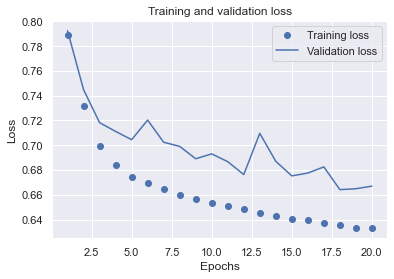

102/102 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.7449


[0.666975200176239, 0.7448572516441345]

In [51]:
# Aufgabe 5 Neuroal Network

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, model_selection, preprocessing
import tensorflow as tf

np.random.seed(42) #Kantengewichte eines NN werden zufällig initialisiert. Ein Seed stellt sicher, dass 
tf.random.set_seed(42) #bei der Initialisierung immer die gleichen (zufälligen) Zahlen herauskommen

print(training_x.shape)

model = tf.keras.Sequential([

tf.keras.layers.Dense(64, activation="relu", input_shape=(4,)),
tf.keras.layers.Dense(64, activation="relu")]) # Ebene mit drei Neuronen, die zwei dimensionale Daten erhält. Aktivierungsfunktion relu


model.add(tf.keras.layers.Dense(3, activation="softmax")
         
         ) # Ebene mit einem Neuron der Aktivierungsfunktion sigmoid ("Wahrscheinlichkeit")
# Hinzufügen einer Ebene geht über den Konstruktor oder model.add

model.summary() # needs input_shape in first layer

# Compile with optimizer
# adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fit model
history = model.fit(training_x, training_y, batch_size=16, epochs=20, validation_data=(test_x, test_y))


# draw loss of training and test for over-fitting

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# only 1% higher than training dataset

model.evaluate(test_x, test_y)

In [1]:
# Aufgabe 6 (add max, min, median)


# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt


import os

hori_mean = []
hori_std = []
hori_max = []
hori_min = []
hori_median = []

ver_mean = []
ver_std = []
ver_max = []
ver_min = []
ver_median = []

# save all data to seperate csv with folders' name

for root1, dirs1, files1 in os.walk(r'C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data'):
    for d in dirs1:
        
        state_filename = d + '_health_state.csv'
        path_state = os.path.join(os.path.join(root1,d),state_filename)
        print(path_state)
        
        df_state = pd.read_csv(path_state)
        
        temp_path = os.path.join(root1,d) # get the Bear_x folder path
        
        print(temp_path)
        
        for root2, dirs2, files2 in os.walk(temp_path): # walk through all csv files in this folder
            for f in files2: # exclude 'health_state.csv'
                if 'state' in f:
                    continue
                    
                path_acc = os.path.join(root2,f)
                
                if 'Bearing1_4' in root2: # only Bearing1_4 with sep ';'
                    df = pd.read_csv(path_acc,sep=';',header=None,names=['h','min','s','us','hori','vert'])
                
                else:
                    df = pd.read_csv(path_acc,header=None,names=['h','min','s','us','hori','vert'])
                
                hori_mean.append(float(df.iloc[:,[4]].mean()))
                hori_std.append(float(df.iloc[:,[4]].std()))
                hori_max.append(float(df.iloc[:,[4]].max()))
                hori_min.append(float(df.iloc[:,[4]].min()))
                hori_median.append(float(df.iloc[:,[4]].median()))
                
                ver_mean.append(float(df.iloc[:,[5]].mean()))
                ver_std.append(float(df.iloc[:,[5]].std()))
                ver_max.append(float(df.iloc[:,[5]].max()))
                ver_min.append(float(df.iloc[:,[5]].min()))
                ver_median.append(float(df.iloc[:,[5]].median()))
                
        df_state['horizontal mean'] = hori_mean
        df_state['horizontal std'] = hori_std
        df_state['horizontal max'] = hori_max
        df_state['horizontal min'] = hori_min
        df_state['horizontal median'] = hori_median
        
        df_state['vertikal mean'] = ver_mean
        df_state['vertikal std'] = ver_std
        df_state['vertikal max'] = ver_max
        df_state['vertikal min'] = ver_min
        df_state['vertikal median'] = ver_median
                
        # save all data of one folder to a csv file, d is the folder's name (e.g Bearing1_4, Bearing 1_5....)        
        out_filename = d + '.csv'
        
        out_path = os.path.join(r'C:\Users\cn_hy\Desktop\New folder\aufgabe6\\',out_filename)
        
        print(out_path)

        df_state.to_csv(out_path,index=False)
        
        hori_mean = []
        hori_std = []
        hori_max = []
        hori_min = []
        hori_median = []

        ver_mean = []
        ver_std = []
        ver_max = []
        ver_min = []
        ver_median = []

C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4\Bearing1_4_health_state.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_4
C:\Users\cn_hy\Desktop\New folder\aufgabe6\\Bearing1_4.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_5\Bearing1_5_health_state.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_5
C:\Users\cn_hy\Desktop\New folder\aufgabe6\\Bearing1_5.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Bearing1_6\Bearing1_6_health_state.csv
C:\Users\cn_hy\Desktop\iff_praktikum\Original\9_Termin Abschlussprojekt\bdml_project_zip\measurement_data\measurement_data\Beari

In [3]:
# Aufgabe 6 combine all csv to a dataframe            

result = pd.DataFrame()

for root3, dirs3, files3 in os.walk(r'C:\Users\cn_hy\Desktop\New folder\aufgabe6\\'):
    for name in files3:
        path = os.path.join(root3, name)
        df = pd.read_csv(path)
        temp_df = df.loc[:,['state', 'horizontal mean', 'horizontal std', 'horizontal max', \
                            'horizontal min', 'horizontal median', 'vertikal mean', 'vertikal std', 'vertikal max', 'vertikal min',\
                           'vertikal median']]
        
        result = pd.concat([result,temp_df])

# save all csv to one csv file
result.to_csv(r'C:\Users\cn_hy\Desktop\New folder\aufgabe6\all.csv',index=False)

result.head(100)


,state,horizontal mean,horizontal std,horizontal max,horizontal min,horizontal median,vertikal mean,vertikal std,vertikal max,vertikal min,vertikal median
0,0,0.006386,0.403295,1.373,-1.511,0.0030,0.001648,0.454933,1.658,-2.045,0.0140
1,0,-0.008861,0.390664,1.299,-1.446,-0.0130,0.006299,0.459195,1.537,-1.685,0.0120
2,0,-0.006355,0.391883,1.313,-1.505,-0.0110,-0.008353,0.491408,2.161,-1.872,0.0050
3,0,-0.005948,0.415829,1.508,-1.476,0.0015,-0.001811,0.474722,1.637,-2.033,0.0090
4,0,-0.001927,0.386722,1.334,-1.225,-0.0085,0.006672,0.511625,1.967,-1.690,0.0020
...,...,...,...,...,...,...,...,...,...,...,...
95,0,-0.004553,0.450286,1.791,-1.688,0.0035,0.008247,0.670704,2.284,-2.561,0.0135
96,0,-0.006220,0.421921,1.274,-1.453,0.0060,0.033827,0.655497,2.599,-2.331,0.0355
97,0,0.003069,0.427490,1.233,-1.382,-0.0040,-0.017491,0.663003,2.296,-2.655,-0.0165
98,0,0.008367,0.417297,1.300,-1.367,0.0195,0.028173,0.618231,2.303,-2.148,0.0300


In [4]:
# Aufgabe 6 Klassifikation und One-Hot

import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\cn_hy\Desktop\New folder\aufgabe6\all.csv')

df_features = df[['horizontal mean', 'horizontal std', 'horizontal max', \
                  'horizontal min', 'horizontal median', 'vertikal mean',\
                  'vertikal std', 'vertikal max', 'vertikal min','vertikal median']]
df_class = df[["state"]]
pd.get_dummies(df_class)

import sklearn.model_selection 
from sklearn.model_selection import train_test_split
training_x, test_x, training_y, test_y = sklearn.model_selection.train_test_split(df_features, df_class, train_size=0.75)

(9768, 10)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 18,307
Trainable params: 18,307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
611/611 [==============================] - 5s 8ms/step - loss: 0.8018 - accuracy: 0.7098 - val_loss: 0.7304 - val_accuracy: 0.7200
Epoch 2/50
611/611 [==============================] - 5s 8ms/step - loss: 0.7116 - accuracy: 0.7315 - val_loss: 0.6489 - val_accuracy: 0.7433
Epoch 3/50
611/611 [==============================] - 5s 8ms/step - loss: 0.6595 - ac

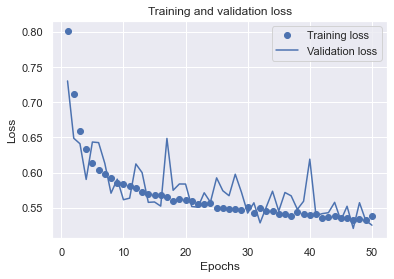

102/102 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.7937


[0.5252229571342468, 0.7936751842498779]

In [7]:
# Aufgabe 6 Neuroal Network

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, model_selection, preprocessing
import tensorflow as tf

np.random.seed(42) #Kantengewichte eines NN werden zufällig initialisiert. Ein Seed stellt sicher, dass 
tf.random.set_seed(42) #bei der Initialisierung immer die gleichen (zufälligen) Zahlen herauskommen

print(training_x.shape)

model = tf.keras.Sequential([

tf.keras.layers.Dense(128, activation="relu", input_shape=(10,)),
tf.keras.layers.Dense(128, activation="relu")]) # Ebene mit drei Neuronen, die zwei dimensionale Daten erhält. Aktivierungsfunktion relu


model.add(tf.keras.layers.Dense(3, activation="softmax")
         
         ) # Ebene mit einem Neuron der Aktivierungsfunktion sigmoid ("Wahrscheinlichkeit")
# Hinzufügen einer Ebene geht über den Konstruktor oder model.add

model.summary() # needs input_shape in first layer

# Compile with optimizer
# adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fit model
history = model.fit(training_x, training_y, batch_size=16, epochs=50, validation_data=(test_x, test_y))


# draw loss of training and test for over-fitting

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# only 1% higher than training dataset

model.evaluate(test_x, test_y)

# In Bezug auf accuracy und loss ist das Modell mit dem erweiterten Datensatz besser.